# Mushroom Classification Model

In [1]:

#Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside the notebook
%matplotlib inline

#models from Scikit-Learn
from sklearn.linear_model import LogisticRegression


#Model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split as split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectKBest, \
    chi2


#Deployment
import pickle

## Load Data

In [2]:

data = pd.read_csv('../data/mushrooms.csv')

In [3]:
# rename colummns
data = data.rename(columns={'class':'target',
                            'cap-shape':'cap_shape','cap-surface':'cap_surface','cap-color':'cap_color','gill-attachment': 'gill_attachment','gill-spacing':'gill_spacing',
                            'gill-size':'gill_size','gill-color':'gill_color','stalk-shape':'stalk_shape','stalk-root':'stalk_root','stalk-surface-above-ring':'stalk_surface_above_ring',
                            'stalk-surface-below-ring':'stalk_surface_below_ring','stalk-color-above-ring':'stalk_color_above_ring','stalk-color-below-ring':'stalk_color_below_ring',
                            'veil-type':'veil_type','veil-color':'veil_color','ring-number':'ring_number','ring-type':'ring_type',
                            'spore-print-color':'spore_print_color'})

data_values = data.values

In [4]:
data.head()

,target,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Sampling Bias

In [5]:
X = data.drop("target",axis=1)
Y = data["target"]

In [6]:
x_train,x_test,y_train,y_test = split(X,Y,test_size=.2)

In [7]:
data["target"].value_counts().to_dict()

{'e': 4208, 'p': 3916}

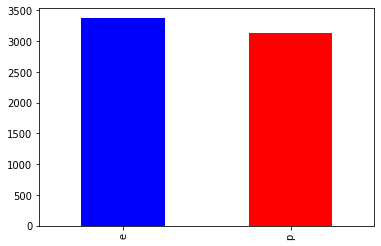

In [8]:
y_train.value_counts().plot(kind="bar", color=["blue","red"])

### Sampling Bias

In [9]:
split = StratifiedShuffleSplit(n_splits = 1, random_state=42, test_size=0.2)

for train_index,test_index in split.split(data, data['target']):
    train_data = data.loc[train_index]
    test_data = data.loc[test_index]
print(train_data.shape, test_data.shape)


(6499, 23) (1625, 23)


## Preprocessing

In [10]:
le = LabelEncoder()

### Train Data

In [11]:
train_data[['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing',
                            'gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring',
                            'stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring',
                            'veil_type','veil_color','ring_number','ring_type',
                            'spore_print_color','population','habitat']] = \
    train_data[['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing',
                            'gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring',
                            'stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring',
                            'veil_type','veil_color','ring_number','ring_type',
                            'spore_print_color','population','habitat']].apply(le.fit_transform)

train_data = train_data.replace('p',0)
train_data = train_data.replace('e',1)

In [12]:
train_data.head()

,target,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
5249,0,2,3,9,0,2,1,0,0,2,...,1,6,0,0,2,1,2,1,5,1
5781,1,5,2,5,1,5,1,0,0,1,...,2,2,7,0,2,2,0,7,1,6
7586,1,0,2,3,0,5,1,1,0,10,...,2,7,7,0,2,2,4,7,3,1
6181,0,2,2,4,0,7,1,0,1,0,...,1,6,7,0,2,1,0,7,4,0
7338,0,3,3,4,0,2,1,0,1,0,...,1,6,6,0,2,1,0,7,4,4


### Test Data

In [13]:
test_data[['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing',
                            'gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring',
                            'stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring',
                            'veil_type','veil_color','ring_number','ring_type',
                            'spore_print_color','population','habitat']] = \
    test_data[['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing',
                            'gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring',
                            'stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring',
                            'veil_type','veil_color','ring_number','ring_type',
                            'spore_print_color','population','habitat']].apply(le.fit_transform)
test_data = test_data.replace('p',0)
test_data = test_data.replace('e',1)

In [14]:
test_data.head()

,target,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
4632,0,4,3,3,0,2,1,0,0,7,...,1,6,4,0,2,1,2,1,5,0
3444,0,4,2,8,0,1,1,0,1,9,...,2,7,7,0,2,1,4,3,3,0
1209,1,4,0,8,0,5,1,1,0,7,...,2,7,7,0,2,1,0,3,3,1
6880,0,1,2,2,0,2,1,0,1,0,...,2,7,7,0,2,1,0,7,4,4
4542,0,4,0,9,0,2,1,0,0,2,...,1,6,4,0,2,1,2,1,5,1


#### Independent and Dependant Variables

Train Data

In [15]:
x_train = train_data.drop('target',axis=1)
y_train = train_data['target']

In [16]:
print(x_train.shape,y_train.shape)

(6499, 22) (6499,)


Test Data

In [17]:
x_test = test_data.drop('target',axis=1)
y_test = test_data['target']

In [18]:
print(x_test.shape,y_test.shape)

(1625, 22) (1625,)


## Feature Importance

In [19]:
log_reg_grid = {'C': np.logspace(-4,4,30),
"solver":["liblinear"]}
#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                           verbose=True)
#fit grid search cv
gs_log_reg.fit(x_train,y_train)
score = gs_log_reg.score(x_test,y_test)
print(score*100)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


96.86153846153846


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    8.7s finished


In [20]:
clf = LogisticRegression(C=2807.2162039411755,solver='liblinear')

In [21]:
clf.fit(x_train,y_train);

In [22]:
clf.coef_

array([[-1.48425481e-02, -3.34834538e-01,  1.15231639e-01,
        -2.15936401e+00,  1.30857135e+00,  3.16709995e+01,
         2.31703777e+01, -2.14342688e+01,  2.02957779e-01,
         1.83469803e+00,  8.87804677e+00,  1.31858613e+01,
        -5.68735427e-01,  2.46961364e-01,  1.25036334e-01,
         0.00000000e+00, -4.83022013e+01, -1.85069872e+00,
        -4.86847889e+00,  1.28405154e-01,  1.24880115e+00,
        -1.70741762e-01]])

In [23]:
feature_dict = dict(zip(train_data.columns,list(clf.coef_[0])))

In [24]:
feature_dict

{'target': -0.014842548123388845,
 'cap_shape': -0.334834537628327,
 'cap_surface': 0.11523163875367685,
 'cap_color': -2.159364010030022,
 'bruises': 1.308571347594788,
 'odor': 31.67099945596585,
 'gill_attachment': 23.170377658058506,
 'gill_spacing': -21.43426883321336,
 'gill_size': 0.20295777946919885,
 'gill_color': 1.8346980343936516,
 'stalk_shape': 8.8780467706509,
 'stalk_root': 13.185861330976053,
 'stalk_surface_above_ring': -0.5687354266062705,
 'stalk_surface_below_ring': 0.2469613644130849,
 'stalk_color_above_ring': 0.12503633447132972,
 'stalk_color_below_ring': 0.0,
 'veil_type': -48.3022013320996,
 'veil_color': -1.8506987245198723,
 'ring_number': -4.86847888597595,
 'ring_type': 0.12840515408940487,
 'spore_print_color': 1.2488011519269797,
 'population': -0.17074176173102354}

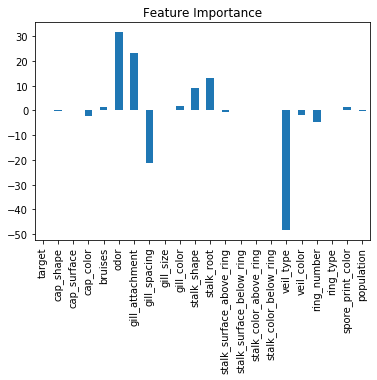

In [25]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

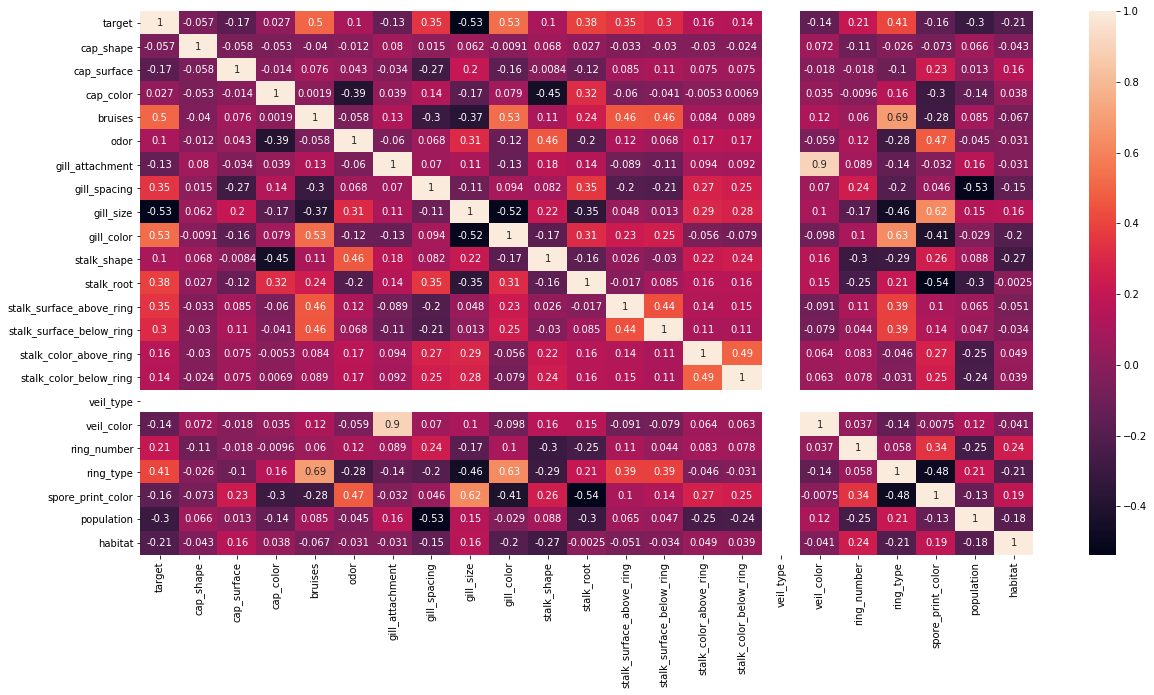

In [26]:
import seaborn as sns;
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True)

In [27]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names are correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(train_data.iloc[:,:22],0.6)
print("Number of correlated features: ", len(set(corr_features)))
print("Independent correlated features are to be deleted are :", corr_features)

corr_test_features = correlation(train_data.iloc[:,:22],0.6)
print("Number of correlated features: ", len(set(corr_features)))
print("Independent correlated features are to be deleted are :", corr_features)

Number of correlated features:  3
Independent correlated features are to be deleted are : {'spore_print_color', 'ring_type', 'veil_color'}
Number of correlated features:  3
Independent correlated features are to be deleted are : {'spore_print_color', 'ring_type', 'veil_color'}


In [28]:
x_train.drop(columns=['cap_shape','cap_color','veil_type','veil_color','ring_type','spore_print_color'],inplace=True)
x_train.shape

(6499, 16)

In [29]:
x_test.drop(columns=['cap_shape','cap_color','veil_type','veil_color','ring_type','spore_print_color'],inplace=True)
x_train.shape

(6499, 16)

In [30]:
pickle.dump(feature_dict,open('../pickle/correlation.pkl','wb'))